In [164]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import numpy as np

In [4]:
#load in data provided by instructions
url = 'https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv'
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [29]:
#check dataset
df.head(30)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [6]:
#describe data
df.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [9]:
#check for nulls
df.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [65]:
#Prep Data for Model
X_Data = df.drop(columns='cvd_4types')
Y_Data = df['cvd_4types']

In [76]:
#Test Model for Logistic Regression using parameters from lecture
clf = linear_model.LogisticRegression(C=1e40 , solver='newton-cg', random_state=4, penalty = )
fit_model = clf.fit(X_Data, Y_Data.values)
fit_model.predict(X_Data.iloc[[22]])
auc = metrics.roc_auc_score(Y_Data.values, fit_model.predict_proba(X_Data)[:,1])
acc = metrics.accuracy_score(Y_Data, fit_model.predict(X_Data))
f1 = metrics.f1_score(Y_Data, fit_model.predict(X_Data))

0.7667218151737177

FOR LOOP THROUGH HYPER PARAMETERS TO FIND BEST MODEL

In [119]:
#Create Lists for Hyperparameters
C_List = [1,1e20,1e40]
Solver_List = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Penalty_List = ['l1','l2','elasticnet','none']

#Create DataFrame to record results
df_res = pd.DataFrame(columns=['C', 'Solver', 'Penalty', 'AUC', 'Accuracy', 'F1'], index=range(33))

In [120]:
#Generate for loop to cycle through all potential models (with exceptions) and record performance
index = 0

for solver in Solver_List:
    for penalty in Penalty_List: #we block out the exceptions below for solvers that do not match with penalties
        if ((solver == 'newton-cg' and penalty == 'l1') or (solver == 'newton-cg' and penalty == 'elasticnet') or
        (solver == 'lbfgs' and penalty == 'l1') or (solver == 'lbfgs' and penalty == 'elasticnet') or
        (solver == 'liblinear' and penalty == 'none') or (solver == 'liblinear' and penalty == 'elasticnet') or
        (solver == 'sag' and penalty == 'l1') or (solver == 'sag' and penalty =='elasticnet') or (solver == 'saga' and penalty =='elasticnet')):
            continue
        for c in C_List:
            clf = linear_model.LogisticRegression(C=c , solver=solver, penalty = penalty, random_state=4)
            fit_model = clf.fit(X_Data, Y_Data.values)
            auc = metrics.roc_auc_score(Y_Data.values, fit_model.predict_proba(X_Data)[:,1])
            acc = metrics.accuracy_score(Y_Data, fit_model.predict(X_Data))
            f1 = metrics.f1_score(Y_Data, fit_model.predict(X_Data))
            df_res.iloc[index,0] = c
            df_res.iloc[index,1] = solver
            df_res.iloc[index,2] = penalty
            df_res.iloc[index,3] = auc
            df_res.iloc[index,4] = acc
            df_res.iloc[index,5] = f1
            index+= 1


0
1
2
3
4
5
6
7
8


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_

9
10
11
12
13
14
15
16
17
18
19
20


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages

21
22
23
24


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


25
26
27
28


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages

29
30
31
32


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [121]:
#it appears that the model using newton-cg, none penalty, and c 1e40 works the best
df_res

,C,Solver,Penalty,AUC,Accuracy,F1
0,1,newton-cg,l2,0.719184,0.695867,0.767013
1,100000000000000000000.0,newton-cg,l2,0.719194,0.695558,0.766722
2,10000000000000000303786028427003666890752.0,newton-cg,l2,0.719194,0.695558,0.766722
3,1,newton-cg,none,0.719194,0.695558,0.766722
4,100000000000000000000.0,newton-cg,none,0.719194,0.695558,0.766722
5,10000000000000000303786028427003666890752.0,newton-cg,none,0.719194,0.695558,0.766722
6,1,lbfgs,l2,0.70397,0.685379,0.756911
7,100000000000000000000.0,lbfgs,l2,0.701361,0.689081,0.759312
8,10000000000000000303786028427003666890752.0,lbfgs,l2,0.701361,0.689081,0.759312
9,1,lbfgs,none,0.701361,0.689081,0.759312


Area Under Curve: 0.719
Accuracy: 0.696
F1 Score: 0.767


/Users/kyleguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


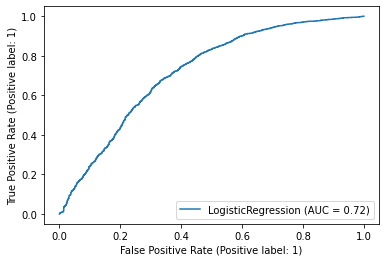

In [136]:
#Create Model using the best parameters
clf = linear_model.LogisticRegression(C=1e40 , solver='newton-cg', penalty = 'none', random_state=4)
fit_model = clf.fit(X_Data, Y_Data.values)
auc = metrics.roc_auc_score(Y_Data.values, fit_model.predict_proba(X_Data)[:,1])
acc = metrics.accuracy_score(Y_Data, fit_model.predict(X_Data))
f1 = metrics.f1_score(Y_Data, fit_model.predict(X_Data))
metrics.plot_roc_curve(clf,X_Data, Y_Data)
print('Area Under Curve:', round(auc,3))
print('Accuracy:', round(acc,3))
print('F1 Score:', round(f1,3))

Display the Features importance ordered by most important

In [166]:
#coefficients are given in the same order as the training data columns
#https://datascience.stackexchange.com/questions/29131/feature-names-in-logisticregression
#Normalize the coefficients
print((X_Data.columns))
print(np.std(X_Data,0)*fit_model.coef_[0])
features = X_Data.columns
Cofs = np.std(X_Data,0)*fit_model.coef_[0]
CofDict = {'Features':features, 'CoEfficients':Cofs}
COFdf = pd.DataFrame(CofDict)

Index(['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20', 'waist',
       'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab', 'bend25',
       'happy25', 'tired25', 'hlthlm25'],
      dtype='object')
age_s1          0.007290
race           -0.372387
educat          0.183015
mstat          -0.137113
hip            -0.609560
neck20         -0.185504
waist           1.136628
av_weight_kg   -0.235567
cgpkyr          0.000386
tea15          -0.066710
srhype          0.072874
parrptdiab      0.159858
bend25          0.088405
happy25        -0.083514
tired25         0.117776
hlthlm25       -0.363242
dtype: float64


,Features,CoEfficients
age_s1,age_s1,0.007290
race,race,-0.372387
educat,educat,0.183015
mstat,mstat,-0.137113
hip,hip,-0.609560
neck20,neck20,-0.185504
waist,waist,1.136628
av_weight_kg,av_weight_kg,-0.235567
cgpkyr,cgpkyr,0.000386
tea15,tea15,-0.066710


In [168]:
#Sort by level of influence:
COFdf.reindex(COFdf.CoEfficients.abs().sort_values(ascending=False).index)

,Features,CoEfficients
waist,waist,1.136628
hip,hip,-0.609560
race,race,-0.372387
hlthlm25,hlthlm25,-0.363242
av_weight_kg,av_weight_kg,-0.235567
neck20,neck20,-0.185504
educat,educat,0.183015
parrptdiab,parrptdiab,0.159858
mstat,mstat,-0.137113
tired25,tired25,0.117776
